In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
main_df=pd.read_csv('fish.csv')

In [6]:
main_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
main_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

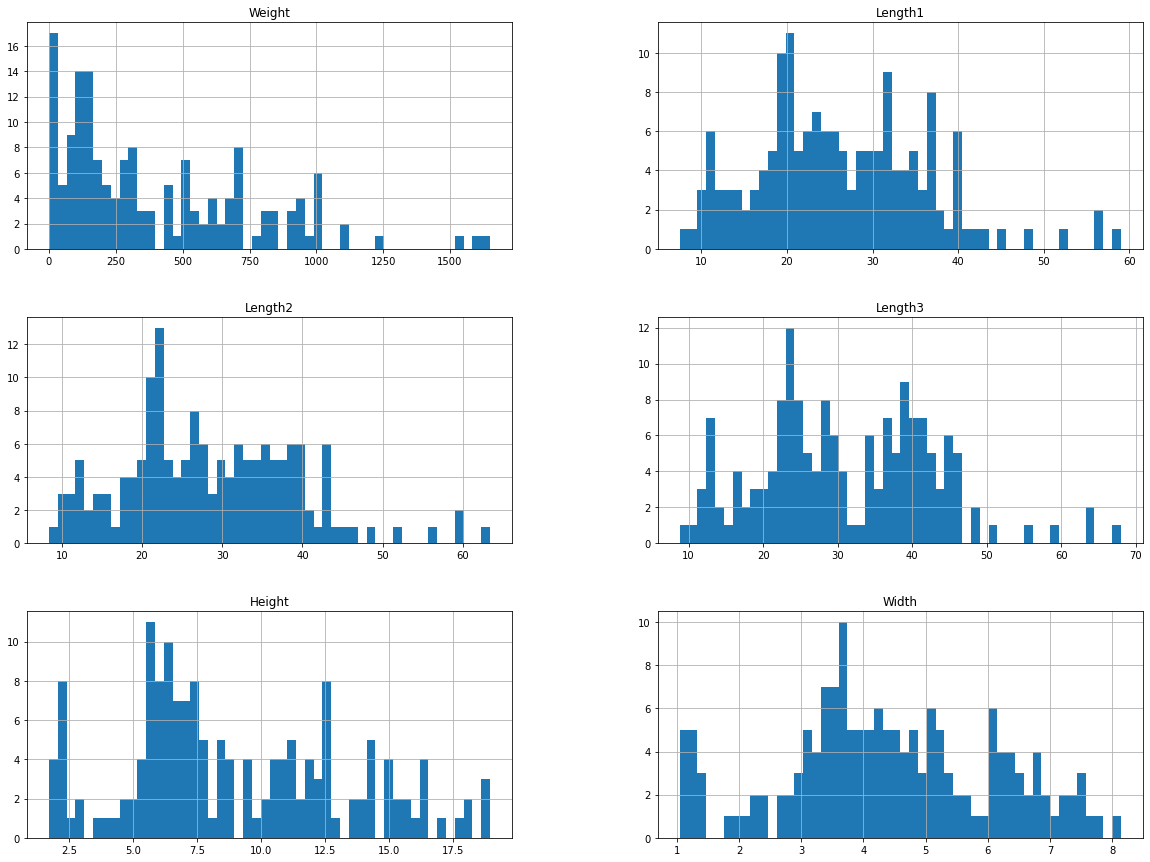

In [9]:
main_df.hist(bins=50,figsize=(20,15))

In [10]:
main_df['Species'].value_counts()/len(main_df)

Perch        0.352201
Bream        0.220126
Roach        0.125786
Pike         0.106918
Smelt        0.088050
Parkki       0.069182
Whitefish    0.037736
Name: Species, dtype: float64

In [11]:
main_df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score

In [13]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [14]:
for train_index,test_index in sss.split(main_df,main_df['Species']):
    strata_train_set=main_df.iloc[train_index]
    strata_test_set=main_df.iloc[test_index]

In [15]:
strata_train_set['Species'].value_counts()/len(strata_train_set)

Perch        0.354331
Bream        0.220472
Roach        0.125984
Pike         0.102362
Smelt        0.086614
Parkki       0.070866
Whitefish    0.039370
Name: Species, dtype: float64

In [16]:
#Similar OVerall Distribution of species in both training and overall set.So far so good!

## Exploratory Data Analysis:

In [17]:
df=strata_train_set.copy()

In [18]:
import seaborn as sns

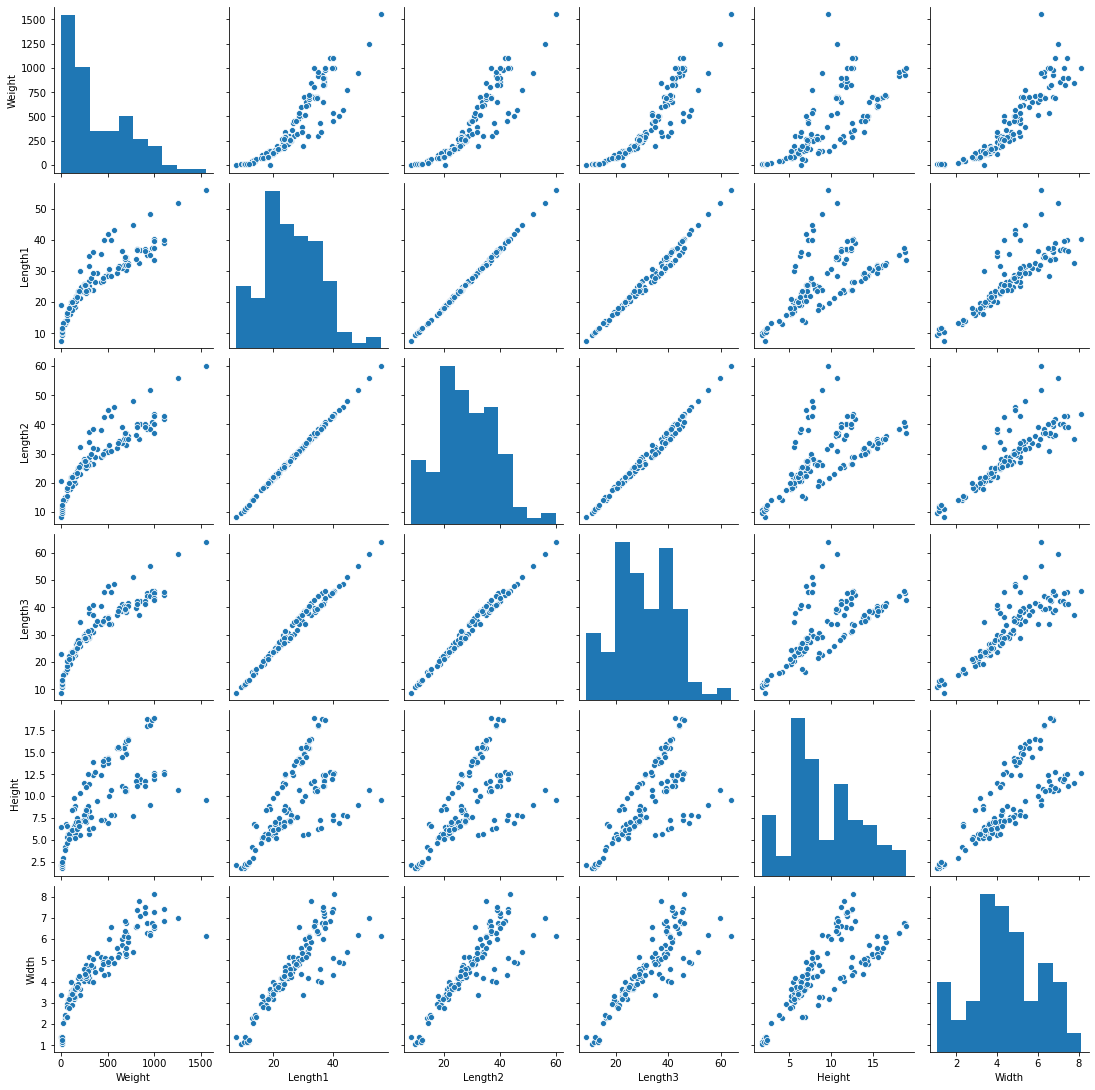

In [19]:
sns.pairplot(df)

In [20]:
#Most of the features are aproximately linear dependent wrt weight.

## Data Preparation For ML Algorithms

In [21]:
features=strata_train_set.drop(['Weight'],axis=1)

In [22]:
label=strata_train_set['Weight']

In [23]:
num_attribs=list(features.columns[1:])

In [24]:
num_attribs

['Length1', 'Length2', 'Length3', 'Height', 'Width']

In [25]:
cat_attribs=['Species']

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [28]:
num_pipeline=Pipeline([('standard_scaler',StandardScaler())])

In [29]:
from sklearn.compose import ColumnTransformer

In [30]:
full_pipeline=ColumnTransformer([('num_pipeline',num_pipeline,num_attribs),('onehotencoder',OneHotEncoder(),cat_attribs)])

In [31]:
features_prepared=full_pipeline.fit_transform(features)

In [32]:
pd.DataFrame(features_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.527811,-0.527829,-0.487545,0.309901,-0.466326,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.629620,-1.682073,-1.698616,-1.633975,-1.897727,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.947548,-0.919098,-0.993665,-0.798183,-0.834253,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.317942,-0.293067,-0.107956,0.586145,-0.252552,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.542518,0.548162,0.723526,1.638613,0.557440,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.490051,0.499254,0.669299,1.553778,0.415523,1.0,0.0,0.0,0.0,0.0,0.0,0.0
123,1.025215,0.988340,0.886207,-0.619337,-0.278344,0.0,0.0,0.0,1.0,0.0,0.0,0.0
124,-1.524686,-1.564692,-1.599200,-1.552386,-1.902646,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125,-0.496330,-0.478920,-0.559848,-0.647804,-0.429498,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## SELECT AND TRAIN MODEL:

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.metrics import mean_squared_error

In [37]:
lin_reg=LinearRegression()

In [38]:
lin_reg.fit(features_prepared,label)

LinearRegression()

In [46]:
predictions_lin=lin_reg.predict(features_prepared)

In [40]:
print('RMSE:\t ',np.sqrt(mean_squared_error(label,predictions_lin)))

RMSE:	  85.70438600226409


In [41]:
scores=cross_val_score(lin_reg,features_prepared,label,cv=10,scoring='neg_mean_squared_error')
lin_reg_rmse=np.sqrt(-scores)

In [42]:
print('RMSE:\t ',lin_reg_rmse)
print('MEAN:\t ',lin_reg_rmse.mean())
print('STANDARD DEVIATION:\t ',lin_reg_rmse.std())

RMSE:	  [ 90.857815   183.75255671  45.39482398  72.80551325  79.52580041
  81.80420376 171.81123157  60.37763429  82.02312446  73.83307136]
MEAN:	  94.21857747955724
STANDARD DEVIATION:	  43.55459573971324


In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
tree_reg=DecisionTreeRegressor()

In [45]:
tree_reg.fit(features_prepared,label)

DecisionTreeRegressor()

In [47]:
predictions_tree=tree_reg.predict(features_prepared)

In [48]:
print('RMSE:\t ',np.sqrt(mean_squared_error(label,predictions_tree)))

RMSE:	  0.0


In [49]:
scores1=cross_val_score(tree_reg,features_prepared,label,cv=10,scoring='neg_mean_squared_error')
tree_reg_rmse=np.sqrt(-scores1)

In [58]:
print('RMSE:\t ',tree_reg_rmse)
print('MEAN:\t ',tree_reg_rmse.mean())
print('STANDARD DEVIATION:\t ',tree_reg_rmse.std())

RMSE:	  [ 55.50211361  96.91265298  45.80922816  60.68622959  65.27521028
  73.04108433 127.89726947  73.38369483 120.53486356  84.67121215]
MEAN:	  80.37135589562182
STANDARD DEVIATION:	  25.874506886653904


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf_reg=RandomForestRegressor(n_estimators=10,random_state=42)

In [54]:
rf_reg.fit(features_prepared,label)

RandomForestRegressor(n_estimators=10, random_state=42)

In [55]:
predictions_rf=rf_reg.predict(features_prepared)

In [60]:
print('RMSE:\t ',np.sqrt(mean_squared_error(label,predictions_rf)))              #Overfitting :(

RMSE:	  32.53827197788915


In [57]:
scores2=cross_val_score(rf_reg,features_prepared,label,cv=10,scoring='neg_mean_squared_error')
rf_reg_rmse=np.sqrt(-scores2)

In [59]:
print('RMSE:\t ',rf_reg_rmse)
print('MEAN:\t ',rf_reg_rmse.mean())
print('STANDARD DEVIATION:\t ',rf_reg_rmse.std())

RMSE:	  [ 78.00245977  59.27566688  49.52168864  58.86613432  55.43049071
  51.26132333 181.55039794  37.86607981  86.89611115  63.02486626]
MEAN:	  72.16952188081977
STANDARD DEVIATION:	  38.79294575982396


## Fine Tuning Our Best Model:

In [61]:
from sklearn.model_selection import GridSearchCV 

In [64]:
forest_reg=RandomForestRegressor(random_state=42)

In [65]:
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
           {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

In [66]:
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [68]:
grid_search.fit(features_prepared,label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
cvres=grid_search.cv_results_

In [71]:
pd.DataFrame(cvres)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009856,0.002121,0.002215,0.001009,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3344.935000,-2755.650214,...,-5605.809372,4619.920482,4,-1313.754928,-2.683667e+03,-8.636313e+02,-1.421797e+03,-1.486908e+03,-1.553952e+03,6.053847e+02
1,0.010965,0.002219,0.000992,0.000006,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-4752.593369,-1107.582273,...,-5711.889480,6058.284931,5,-640.425588,-1.180165e+03,-9.213598e+02,-1.020684e+03,-1.867215e+03,-1.125970e+03,4.101426e+02
2,0.026789,0.000831,0.001794,0.000398,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-3839.731865,-1542.323976,...,-5349.362427,5241.975618,2,-1082.864585,-9.378523e+02,-7.716057e+02,-7.583689e+02,-7.663769e+02,-8.634137e+02,1.285139e+02
3,0.003992,0.000004,0.000000,0.000000,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-5079.757991,-7213.316154,...,-8278.074225,3811.747896,16,-1070.998790,-2.750270e+03,-2.215004e+03,-1.604670e+03,-1.127482e+03,-1.753685e+03,6.459711e+02
4,0.009670,0.000522,0.000800,0.000400,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-3754.469692,-1949.641173,...,-6081.329414,5641.928764,9,-668.357565,-7.845164e+02,-1.107011e+03,-1.166445e+03,-1.317867e+03,-1.008840e+03,2.434026e+02
5,0.031783,0.009346,0.001991,0.000008,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-4021.734853,-1713.655473,...,-5531.228635,5067.253126,3,-1020.529187,-8.415235e+02,-8.326777e+02,-8.230130e+02,-6.543837e+02,-8.344254e+02,1.159598e+02
6,0.003942,0.000567,0.000400,0.000491,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-11233.373248,-4123.568291,...,-8758.457739,4606.886541,17,-1687.555809,-2.615467e+03,-6.620838e+02,-9.198590e+02,-1.805422e+03,-1.538077e+03,6.934181e+02
7,0.009973,0.000006,0.001115,0.000238,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-6202.891973,-3187.606831,...,-6152.484188,3898.666709,10,-715.140182,-9.310376e+02,-6.761243e+02,-7.236315e+02,-1.726250e+03,-9.544367e+02,3.960392e+02
8,0.027452,0.000517,0.002356,0.000645,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-6399.552163,-2751.843285,...,-6530.880433,4486.622435,11,-1153.600912,-9.514643e+02,-7.840696e+02,-6.367280e+02,-7.295203e+02,-8.510766e+02,1.826526e+02
9,0.003592,0.000493,0.000797,0.000399,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-4993.513547,-5657.448974,...,-7469.461375,3524.951343,15,-2764.196513,-1.704937e+03,-7.477453e+02,-1.195239e+03,-1.228856e+03,-1.528195e+03,6.882590e+02


In [72]:
for score,param in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-score),param)

74.87195317088992 {'max_features': 2, 'n_estimators': 3}
75.5770433376534 {'max_features': 2, 'n_estimators': 10}
73.1393357021874 {'max_features': 2, 'n_estimators': 30}
90.98392289088981 {'max_features': 4, 'n_estimators': 3}
77.98287897915108 {'max_features': 4, 'n_estimators': 10}
74.37223026475573 {'max_features': 4, 'n_estimators': 30}
93.58663226552935 {'max_features': 6, 'n_estimators': 3}
78.43777271168038 {'max_features': 6, 'n_estimators': 10}
80.81386287717983 {'max_features': 6, 'n_estimators': 30}
86.42604570026685 {'max_features': 8, 'n_estimators': 3}
76.93902851839141 {'max_features': 8, 'n_estimators': 10}
77.20545887276265 {'max_features': 8, 'n_estimators': 30}
82.96178531652983 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
77.6596962372474 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
100.34182631061898 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
85.66264694881266 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


In [73]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

In [74]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

## TESTING OUR FINE TUNED BEST MODEL:

In [75]:
X_test=strata_test_set.drop(['Weight'],axis=1)

In [76]:
Y_test=strata_test_set['Weight']

In [77]:
final_model=grid_search.best_estimator_

In [78]:
X_test_prepared=full_pipeline.transform(X_test)

In [79]:
final_predictions=final_model.predict(X_test_prepared)

In [80]:
print('RMSE:\t ',np.sqrt(mean_squared_error(Y_test,final_predictions)))

RMSE:	  62.15230418596723
